In [12]:
from dgp import *


adj = get_graph(40, 3)
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

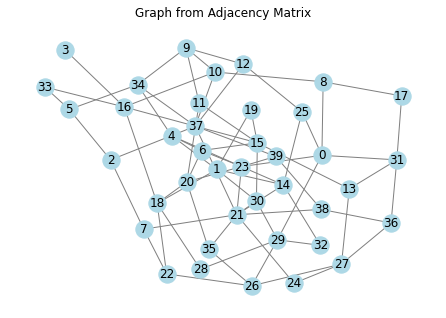

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Example: create a random adjacency matrix
adj_matrix = adj.copy()

# Create the graph
G = nx.from_numpy_array(adj_matrix)

# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Graph from Adjacency Matrix")
plt.show()


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(adj_matrix, node_values=None, title="Graph from Adjacency Matrix"):
    G = nx.from_numpy_array(adj_matrix)

    # Use spring layout with fixed seed for reproducibility
    pos = nx.spring_layout(G, seed=42, k=0.15)

    # Optional: color nodes by value
    if node_values is not None:
        node_color = [node_values[i] for i in G.nodes()]
        cmap = plt.cm.viridis
    else:
        node_color = "lightblue"
        cmap = None

    # White background and larger figure
    plt.figure(figsize=(12, 10), facecolor='white')

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=0.6)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                           node_color=node_color,
                           node_size=40, 
                           cmap=cmap, 
                           alpha=0.9)

    # Skip labels if too many nodes
    if len(G) <= 50:
        nx.draw_networkx_labels(G, pos, font_size=8)
    else:
        print(f"Graph has {len(G)} nodes: labels skipped for readability.")

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


Graph has 800 nodes: labels skipped for readability.


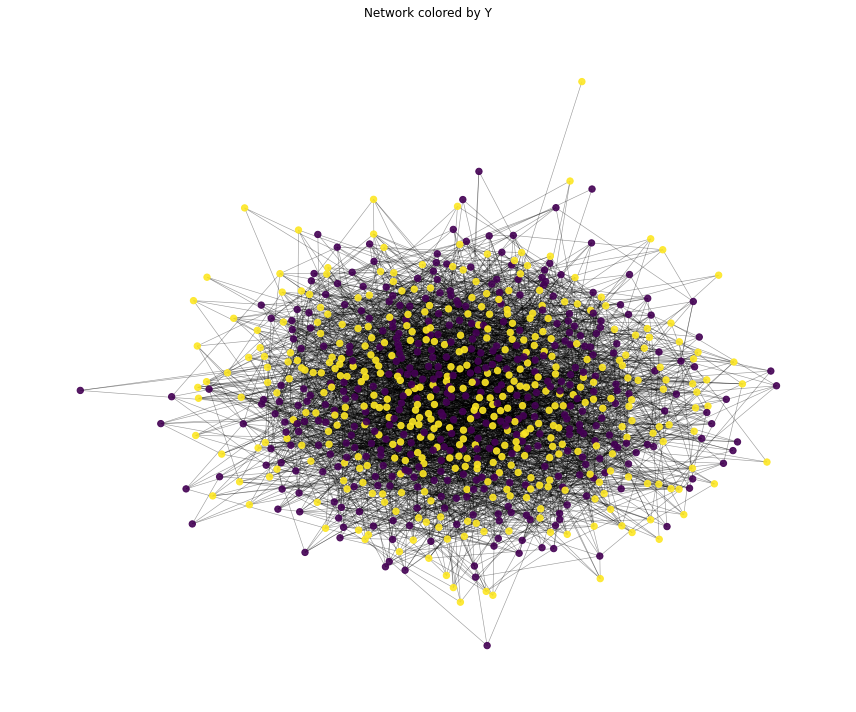

In [9]:
# Suppose Y is the vector from your Gibbs sampler output
Y = np.random.choice([0,1], adj_matrix.shape[0])  # Example: random values for Y
plot_graph(adj_matrix, node_values=Y, title="Network colored by Y")


In [1]:
from dgp import *
from estimation import *

# 1. Simulate or load data
adj = get_graph(2000, 1, 1, seed=2)

# generate a adjacency matrix with 800 nodes with fully connected 80 clusters
# adj = np.zeros((800, 800))
# num_clusters = 80
# cluster_size = int(adj.shape[0] / num_clusters)
# for i in range(num_clusters):
#     start = i * cluster_size
#     end = start + cluster_size
#     adj[start:end, start:end] = 1
#     # set diagonal to 0
#     np.fill_diagonal(adj[start:end, start:end], 0)

tau = np.array([-1.0, 0.50, -0.50])       # shape (3,)
rho = np.array([[0,0.1,0.2],
                [0.1,0,0.1],
                [0.2,0.1,0]])      # shape (3, 3), with 0s on the diagonal
nu = np.array([0.1,0,0,0.1,0,0,0.1,0,0]).reshape(3,3)       # shape (3, 3)
gamma = np.array([-1.00,0.50,0.10,0.20,0.05,0.25,-0.08,0.30])     # shape (8,)
beta = np.array([-0.30,-0.60,-0.20,-0.20,-0.05,-0.10,-0.01,0.40,0.01,0.20])     # shape (10,)

Y, A, L = sample_network(adj, tau, rho, nu, gamma, beta, num_iter=100000)
print(Y.shape, A.shape, L.shape, Y.mean(), A.mean(), L.mean())

# # 2. Estimate models
# models = estimate_models(Y, A, L, adj)

# # 3. Compute influence values
# a = np.random.binomial(1, 0.5, size=Y.shape[0])
# psi = compute_influence_function(Y, A, L, adj, models, a)

# # 4. Sample average treatment effect estimate:
# ate = np.mean(psi)
# ate

(2000,) (2000,) (2000, 3) 0.3815 0.383 0.4535


In [76]:
from agcEffect import *

agc_effect(
    adj,
    tau, rho, nu, beta,
    treatment_allocation=0.7,
    R=30,
    burnin_R=10,
    seed=0
)

{'average': 0.32214999999999994,
 'direct_effect': -0.13916666666666666,
 'spillover_effect': -0.03300000000000003,
 'psi_gamma': 0.32214999999999994,
 'psi_1_gamma': 0.2801166666666666,
 'psi_0_gamma': 0.4192833333333333,
 'psi_zero': 0.4522833333333333}

In [ ]:
from drnet_new import doubly_robust


doubly_robust(A, L, Y, adj, treatment_allocation=0.7, num_rep=1000)

psi_zero: [0.4316907308853899]
beta_hat: 0.42927883349113427
psi_0_gamma: [0.46516614361359243, 0.4020274953630365, 0.3941459450045273, 0.4046035744440326, 0.411764921689139, 0.42297714128145186, 0.4282036145889008, 0.3976875576981512, 0.40196294494522644, 0.42763372465704846, 0.46147269215380593, 0.4272099640074428, 0.4158180752396587, 0.4036463920041291, 0.40505161537092293, 0.4497434145281977, 0.41930441097577104, 0.38827116359406677, 0.4280240988018534, 0.3681028467087298, 0.38107756659636505, 0.4328684262764952, 0.468590289060327, 0.4241924740976092, 0.41378828341960855, 0.45577448222785, 0.39404950890088947, 0.3979539711713991, 0.4098573923421415, 0.4540455592746296, 0.4277194531267048, 0.41149911286685803, 0.3977747141953777, 0.44194982708443026, 0.39991380258939285, 0.43783565037805294, 0.40877093452819363, 0.4008840190144883, 0.4387185829397566, 0.4505017762439024, 0.4660254750952125, 0.43514792685103476, 0.4335049066293805, 0.4212674311561875, 0.4254683879175808, 0.4150571362

{'average': 0.3487987942474032,
 'direct_effect': -0.1047478998525489,
 'spillover_effect': -0.010862958221451058,
 'psi_gamma': 0.3487987942474032,
 'psi_1_gamma': 0.31607987281138994,
 'psi_0_gamma': 0.42082777266393884,
 'psi_zero': 0.4316907308853899}

In [7]:
from autognet2 import evaluate_autognet_via_agc_effect

evaluate_autognet_via_agc_effect(adj, Y, A, L, treatment_allocation=0.7, R=30, burnin=10, seed=2)

tau: [-0.96882541  0.57795709 -0.4198677 ]
rho: [[0.         0.05883729 0.1583634 ]
 [0.05883729 0.         0.1583634 ]
 [0.05883729 0.1583634  0.        ]]
nu: [[ 0.15126609 -0.03320981 -0.06959112]
 [ 0.15126609 -0.03320981 -0.06959112]
 [ 0.15126609 -0.03320981 -0.06959112]]
beta: [-0.27378206 -0.68894404 -0.14276307 -0.31992895  0.07251073  0.01232159
 -0.02548723  0.24808236 -0.07258501  0.3941943 ]


{'average': 0.33070000000000005,
 'direct_effect': -0.17271666666666674,
 'spillover_effect': -0.023249999999999937,
 'psi_gamma': 0.33070000000000005,
 'psi_1_gamma': 0.27846666666666664,
 'psi_0_gamma': 0.4511833333333334,
 'psi_zero': 0.4744333333333333}

In [78]:
from autognet import *

evaluate_autog_effect(adj, Y, A, L, treatment_allocation=0.7, R=30, burnin=10, seed=1)

{'average': 0.34185,
 'direct_effect': -0.12439999999999996,
 'spillover_effect': -0.0013875000000000415,
 'psi_gamma': 0.34185,
 'psi_1_gamma': 0.3036375,
 'psi_0_gamma': 0.42803749999999996,
 'psi_zero': 0.429425}

In [ ]:
from drnet_new import *

def doubly_robust_IF_test(a_vector, A, L, Y, adj_matrix):
    # fit models
    X_y = build_design_matrix_Y(A, L, Y, adj_matrix)
    model_y = fit_logistic_model(X_y, Y)
    X_a = build_design_matrix_A(L, A, adj_matrix)
    model_a = fit_logistic_model(X_a, A)
    
    # compute beta_hat
    beta_hat = compute_beta_probs(X_y, model_y)
    
    # compute pi
    gamma = np.concatenate([model_a.intercept_, model_a.coef_.flatten()])
    N = adj_matrix.shape[0]
    neighbours = [list(adj_matrix[i].nonzero()[0]) for i in range(N)]
    L_nb = get_neighbor_summary(L, adj_matrix)
    GL = gamma[0] + L.dot(np.array([gamma[1], gamma[3], gamma[5]])) \
        + L_nb.dot(np.array([gamma[2], gamma[4], gamma[6]]))
    
    numerator = get_numerator_pi(a_vector, A, GL, neighbours, gamma, adj_matrix)
    
    denominator = get_norm_constant(A, GL, neighbours, gamma, adj_matrix)
    
    # compute the influence function
    pi = numerator / denominator
    print(pi.mean(), pi.std(), denominator.mean(), denominator.std())
    psi = 1 / pi * (Y - beta_hat) + beta_hat
    return psi

def get_numerator_pi(a_vector, A, GL, neighbours, gamma, adj_matrix, Atype='ind_treat_1'):
    N = adj_matrix.shape[0]
    aGL = a_vector * GL
        
    GL_neighbour = np.array([np.sum(aGL[[i]+neighbours[i]], axis=0) for i in range(N)])
    aa_n, aa_out = np.zeros(N), np.zeros(N)
    for i in range(N):
        ni = [i]+neighbours[i]
        vec_n = a_vector[ni].copy()
        if Atype == 'ind_treat_1':
            vec_n[0] = 1
        elif Atype == 'ind_treat_0':
            vec_n[0] = 0
        # compute outter product
        mat_n = np.outer(vec_n, vec_n)
        adj_max_n = adj_matrix[ni, :][:, ni]
        aa_n[i] = np.sum(mat_n[adj_max_n == 1])/2
        
        nout = list(set(range(N)) - set(ni))
        vec_n_out = A[nout].copy()
        mat_n_out = np.outer(vec_n, vec_n_out)
        adj_max_n_out = adj_matrix[ni, :][:, nout]
        aa_out[i] = np.sum(mat_n_out[adj_max_n_out == 1])
        
    numerator = np.exp(GL_neighbour + gamma[7]*aa_n + gamma[7]*aa_out)
    return numerator

def get_numerator_pi_vec(a_mat, A, GL, neighbours, gamma, adj_matrix, Atype='ind_treat_1'):
    N = adj_matrix.shape[0]
    aGL = (a_mat.T * GL).T
    
    GL_neighbour = np.array([np.sum(aGL[[i]+neighbours[i]], axis=0) for i in range(N)])
    aa_n, aa_out = np.zeros((N, a_mat.shape[1])), np.zeros((N, a_mat.shape[1]))
    I = np.zeros((N, a_mat.shape[1]))
    for i in range(N):
        ni = [i]+neighbours[i]
        vec_n = a_mat[ni].copy()
        if Atype == 'ind_treat_1':
            vec_n[0] = 1
        elif Atype == 'ind_treat_0':
            vec_n[0] = 0
        # compute outter product
        mat_n = np.einsum('ik,jk->ijk', vec_n, vec_n)
        adj_max_n = adj_matrix[ni, :][:, ni]
        aa_n[i] = (mat_n * adj_max_n[:, :, None]).sum(axis=(0, 1))/2
        
        nout = list(set(range(N)) - set(ni))
        vec_n_out = A[nout].copy()
        mat_n_out = np.einsum('ik,j->ijk', vec_n, vec_n_out)
        adj_max_n_out = adj_matrix[ni, :][:, nout]
        aa_out[i] = (mat_n_out * adj_max_n_out[:, :, None]).sum(axis=(0, 1))
        
        # compute indicator
        I[i] = np.all(vec_n == A[ni].reshape(-1,1), axis=0).astype(int)
        
    
    numerator = np.exp(GL_neighbour + gamma[7]*aa_n + gamma[7]*aa_out)
    return numerator, I

def get_norm_constant(A, GL, neighbours, gamma, adj_matrix, n_rep=1000):
    # compute denominator
    N = adj_matrix.shape[0]
    a_mat = np.random.binomial(1, 0.5, size=(N, n_rep))
    aGL = (a_mat.T * GL).T
    GL_neighbour = np.array([np.sum(aGL[[i]+neighbours[i]], axis=0) for i in range(N)])
    aa_n, aa_out = np.zeros((N, n_rep)), np.zeros((N, n_rep))
    for i in range(N):
        ni = [i]+neighbours[i]
        vec_n = a_mat[ni] # 10 by 1000
        # compute outter product to get a thousand 10 by 10
        mat_n = np.einsum('ik,jk->ijk', vec_n, vec_n)
        adj_max_n = adj_matrix[ni, :][:, ni]
        aa_n[i] = (mat_n * adj_max_n[:, :, None]).sum(axis=(0, 1))/2
        
        nout = list(set(range(N)) - set(ni))
        vec_n_out = A[nout] # 790 by 1
        mat_n_out = np.einsum('ik,j->ijk', vec_n, vec_n_out)
        adj_max_n_out = adj_matrix[ni, :][:, nout]
        aa_out[i] = (mat_n_out * adj_max_n_out[:, :, None]).sum(axis=(0, 1))
    
    denominator = np.exp(GL_neighbour + gamma[7]*aa_n + gamma[7]*aa_out)
    
    # approximate the sum in the denominator
    num_neighbours = np.array([len(neighbours[i]) for i in range(N)])
    group_size = num_neighbours + 1
    num_a_group = 2**group_size
    denominator = np.mean(denominator, axis=1) * num_a_group
    
    return denominator


def doubly_robust_test(A, L, Y, adj_matrix, treatment_allocation=0.7, num_rep=1000):
    # fit models
    X_y = build_design_matrix_Y(A, L, Y, adj_matrix)
    model_y = fit_logistic_model(X_y, Y)
    X_a = build_design_matrix_A(L, A, adj_matrix)
    model_a = fit_logistic_model(X_a, A)
    
    # compute pi
    #gamma = np.concatenate([model_a.intercept_, model_a.coef_.flatten()])
    gamma = np.array([-1.00,0.50,0.10,0.20,0.05,0.25,-0.08,0.30])
    N = adj_matrix.shape[0]
    neighbours = [list(adj_matrix[i].nonzero()[0]) for i in range(N)]
    L_nb = get_neighbor_summary(L, adj_matrix)
    GL = gamma[0] + L.dot(np.array([gamma[1], gamma[3], gamma[5]])) \
        + L_nb.dot(np.array([gamma[2], gamma[4], gamma[6]]))
        
    denominator = get_norm_constant(A, GL, neighbours, gamma, adj_matrix)
    
    # # compute the influence function
    # a_mat = np.random.binomial(1, treatment_allocation, size=(Y.shape[0], num_rep))
    # numerator_vec, I = get_numerator_pi_vec(a_mat, A, GL, neighbours, gamma, adj_matrix)
    # pi_vec = numerator_vec / denominator[:, None]
    
    # psi_gamma = []
    # for i in range(num_rep):
    #     X_y_eval = build_design_matrix_Y(a_mat[:,i], L, Y, adj_matrix)
    #     beta_hat = compute_beta_probs(X_y_eval, model_y, Atype='all')
    #     psi = beta_hat + I[:,i] / pi_vec[:, i] * (Y - beta_hat)
    #     psi_gamma.append(psi.mean())
    
    # numerator, I = get_numerator_pi_vec(a_mat, A, GL, neighbours, gamma, adj_matrix, Atype='ind_treat_1')
    # pi_1_vec = numerator / denominator[:, None]
    # psi_1_gamma = []
    # for i in range(num_rep):
    #     X_y_eval = build_design_matrix_Y(a_mat[:,i], L, Y, adj_matrix)
    #     beta_hat = compute_beta_probs(X_y_eval, model_y, Atype='ind_treat_1')
    #     psi = beta_hat + I[:,i] / pi_1_vec[:, i] * (Y - beta_hat)
    #     psi_1_gamma.append(psi.mean())
        
    # numerator, I = get_numerator_pi_vec(a_mat, A, GL, neighbours, gamma, adj_matrix, Atype='ind_treat_0')
    # pi_0_vec = numerator / denominator[:, None]
    # psi_0_gamma = []
    # for i in range(num_rep):
    #     X_y_eval = build_design_matrix_Y(a_mat[:,i], L, Y, adj_matrix)
    #     beta_hat = compute_beta_probs(X_y_eval, model_y, Atype='ind_treat_0')
    #     psi = beta_hat + I[:,i] / pi_0_vec[:, i] * (Y - beta_hat) 
    #     psi_0_gamma.append(psi.mean())
    
    a_mat = np.zeros((Y.shape[0],1))
    numerator, I = get_numerator_pi_vec(a_mat, A, GL, neighbours, gamma, adj_matrix, Atype='all_0')
    pi_zero_vec = numerator / denominator[:, None]
    psi_zero = []
    X_y_eval = build_design_matrix_Y(a_mat, L, Y, adj_matrix)
    beta_hat = compute_beta_probs(X_y_eval, model_y, Atype='all_0')
    psi =  beta_hat + I[:,0] / pi_zero_vec[:, 0] * (Y - beta_hat)
    psi_zero.append(psi.mean())
    
    # Compute effects
    # avg_psi_gamma = np.mean(psi_gamma)
    # direct_effect = np.mean(psi_1_gamma) - np.mean(psi_0_gamma)
    # spillover_effect = np.mean(psi_0_gamma) - np.mean(psi_zero)
    print(psi_zero)
    # return {
    #     "average": avg_psi_gamma,
    #     "direct_effect": direct_effect,
    #     "spillover_effect": spillover_effect,
    #     "psi_gamma": np.mean(psi_gamma),
    #     "psi_1_gamma": np.mean(psi_1_gamma),
    #     "psi_0_gamma": np.mean(psi_0_gamma),
    #     "psi_zero": np.mean(psi_zero),
    # }
    return beta_hat, I, pi_zero_vec, Y - beta_hat, psi
    

#doubly_robust_IF_test(a, A, L, Y, adj)
beta_hat, I, pi_zero_vec, y_beta, psi = doubly_robust_test(A, L, Y, adj, treatment_allocation=0.7, num_rep=1000)
#den, GL_neighbour, aa_n, aa_out, gamma7 = doubly_robust_test(A, L, Y, adj, treatment_allocation=0.7, num_rep=1000)

[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]
[[0.]
 [0.]]

In [113]:
np.mean(Y), Y[I[:,0]==1].mean(), Y[I[:,0]==0].mean()

(0.3815, 0.43861892583120204, 0.3448275862068966)

In [70]:
set(den[0]), set(GL_neighbour[0]), set(aa_n[0]), set(aa_out[0]), gamma7

({0.42316208231774877, 0.559898366565402, 1.0},
 {-1.1600000000000001, -0.5800000000000001, 0.0},
 {0.0, 1.0},
 {0.0},
 0.3)

In [71]:
set(den[1]), set(GL_neighbour[1]), set(aa_n[1]), set(aa_out[1]), gamma7

({0.23457028809379765, 0.38674102345450123, 0.44932896411722156, 1.0},
 {-1.75, -0.95, -0.8, 0.0},
 {0.0, 1.0},
 {0.0},
 0.3)

In [79]:
np.mean(psi), np.mean(beta_hat), np.mean(I[:,0] / pi_zero_vec[:, 0] * Y)

(0.3582299888064327, 0.42927883349113427, 0.1830593327242234)

0.30530973451327437


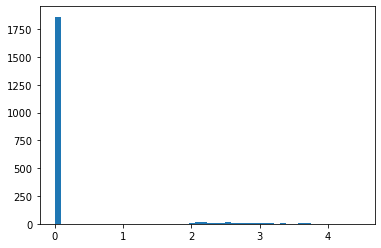

In [107]:
_ = plt.hist(Y/pi_zero_vec[:,0]*I[:,0], bins=50)
print(np.mean(Y*I[:,0])/np.mean(I[:,0]))

In [ ]:
(0.3523158554341126, 0.42927883349113427, 0.23777889679613556)

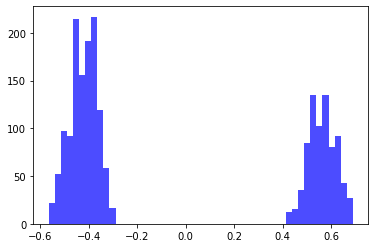

In [80]:
import matplotlib.pyplot as plt

_ = plt.hist(y_beta, bins=50, alpha=0.7, color='blue', label='y - beta_hat')

In [81]:
I.shape, pi_zero_vec.shape, y_beta.shape

((2000, 1), (2000, 1), (2000,))

In [82]:
(I[:,0] / pi_zero_vec[:, 0]*y_beta).shape

(2000,)

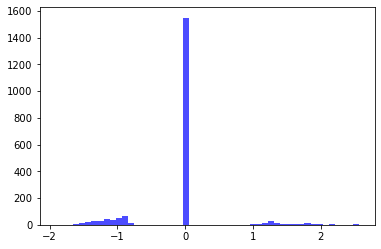

In [86]:
_ = plt.hist(I[:,0] / pi_zero_vec[:, 0]*y_beta, bins=50, alpha=0.7, color='blue', label='y - beta_hat')

In [84]:
np.mean(beta_hat), np.mean(I), np.mean(1/pi_zero_vec), np.mean(Y), np.mean(I/ pi_zero_vec* (Y - beta_hat))

(0.42927883349113427, 0.226, 2.6153481615780403, 0.3815, -0.02832388589927213)

In [5]:
from drnet_new import doubly_robust


doubly_robust(A, L, Y, adj, treatment_allocation=0.7, num_rep=1000)

[0.4664050324694142]


{'average': 0.3311504460473878,
 'direct_effect': -0.16594612003611126,
 'spillover_effect': -0.016858876875919915,
 'psi_gamma': 0.3311504460473878,
 'psi_1_gamma': 0.28360003555738306,
 'psi_0_gamma': 0.4495461555934943,
 'psi_zero': 0.4664050324694142}

In [63]:
neighbours = [list(adj[i].nonzero()[0]) for i in range(adj.shape[0])]
count = 0
for i in range(2000):
    print(A[[i]+neighbours[i]])
    if np.all(A[[i]+neighbours[i]] == 0):
        count += 1 

print(count)

[1 0]
[0 1 1]
[0 0 1]
[1 1]
[1 1]
[1 1 0]
[0 0]
[1 0 0]
[0 1]
[0 0 0]
[1 1]
[0 0 1]
[0 0 0]
[0 0 1]
[1 0 1]
[0 0 0]
[0 0 1]
[0 0 1]
[0 1]
[0 0]
[0 0]
[0 0]
[1 1 1]
[0 0 0]
[0 1 0]
[0 1]
[0 0]
[0 0]
[1 0 0]
[0 0 0]
[1 1 0]
[0 1]
[1 0]
[1 1 0]
[0 1]
[1 1]
[0 0 0]
[0 0 0]
[1 0 0]
[0 0]
[1 1]
[0 1]
[1 0]
[0 0 0]
[1 0 0]
[0 0 0]
[0 0 0]
[0 1]
[0 0]
[1 1]
[0 0]
[1 1]
[0 0]
[1 0]
[0 0]
[0 0 1]
[0 1 1]
[0 0 0]
[0 1 0]
[1 0 0]
[0 1]
[0 1]
[0 0]
[0 1 1]
[0 0]
[0 0 1]
[1 1 0]
[0 0 1]
[1 1]
[1 0 0]
[1 0 1]
[1 1]
[1 0]
[1 0]
[0 0 1]
[1 1 1]
[0 0 0]
[0 0 1]
[1 1]
[1 1]
[0 0]
[0 1]
[0 0 1]
[1 1]
[1 0 0]
[0 0]
[1 1]
[0 0]
[0 1]
[0 0]
[0 1]
[1 0]
[0 0]
[0 0]
[0 0]
[1 1 0]
[1 1]
[1 0 0]
[0 0]
[1 0]
[0 1]
[0 1 0]
[0 0]
[0 1]
[0 1 0]
[0 0]
[0 0]
[0 0 1]
[0 0 0]
[0 0]
[1 1 0]
[0 0 0]
[1 1 0]
[0 0 1]
[0 1]
[0 0]
[0 0]
[0 1 1]
[1 0]
[1 0 1]
[1 1]
[1 1 1]
[1 1]
[1 0]
[0 0]
[1 1 0]
[0 0 0]
[0 0]
[1 0]
[1 0 1]
[1 1 0]
[0 1 0]
[0 0 1]
[0 0 0]
[0 1 1]
[0 0]
[1 0]
[0 1]
[1 0]
[0 0 0]
[0 1 1]
[1 1 0]
[1 1 0]
[0 0]


In [12]:
from estimation import *

average = []
models = estimate_models(Y, A, L, adj)
for i in tqdm(range(1000)):
    a = np.random.binomial(1, 0.7, size=Y.shape[0])
    #a = np.zeros(Y.shape[0])
    psi = compute_influence_function(Y, A, L, adj, models, a)
    psi_mean = np.mean(psi)
    average.append(psi_mean)

np.mean(average)

  2%|▏         | 21/1000 [00:07<05:51,  2.79it/s]


KeyboardInterrupt: 

In [11]:
average = []
models = estimate_models(Y, A, L, adj)
for i in tqdm(range(1000)):
    a = np.zeros(Y.shape[0])
    psi = compute_influence_function(Y, A, L, adj, models, a)
    psi_mean = np.mean(psi)
    average.append(psi_mean)

np.mean(average)

  3%|▎         | 26/1000 [00:09<05:38,  2.88it/s]


KeyboardInterrupt: 

In [93]:
from itertools import product

def generate_binary_vectors(m):
    return list(product([0, 1], repeat=m))

def get_norm_constant(A, GL, neighbours, gamma, adj_matrix):
    N = GL.shape[0]
    
    norm_const = np.zeros(N)
    for i in tqdm(range(N)):
        neighbours_i = neighbours[i]
        group_i = [i]+neighbours_i
        a_group_all = generate_binary_vectors(len(group_i))
        
        norm_const_i = 0
        for a_group in a_group_all:
            aGLi = np.sum(GL[group_i] * a_group)
            
            mat_n = np.outer(a_group, a_group)
            adj_max_n = adj_matrix[group_i, :][:, group_i]
            aa_n_i = np.sum(mat_n[adj_max_n == 1])/2
            
            nout = list(set(range(N)) - set(group_i))
            vec_n_out = A[nout]
            mat_n_out = np.outer(a_group, vec_n_out)
            adj_max_n_out = adj_matrix[group_i, :][:, nout]
            aa_out_i = np.sum(mat_n_out[adj_max_n_out == 1])
            
            norm_const_i += np.exp(aGLi + gamma[7]*aa_n_i + gamma[7]*aa_out_i)
        
        norm_const[i] = norm_const_i
    return norm_const

neighbours = [list(adj[i].nonzero()[0]) for i in range(800)]
gamma = np.array([-1.00,0.50,0.10,0.20,0.05,0.25,-0.08,0.30])     # shape (8,)
get_norm_constant(A, A, neighbours, gamma, adj)

 44%|████▎     | 348/800 [01:20<01:44,  4.33it/s]


KeyboardInterrupt: 

In [83]:
2**np.arange(9)

array([  1,   2,   4,   8,  16,  32,  64, 128, 256])

In [63]:
mat = np.arange(9).reshape(3, 3) * np.array([0.1,-0.1,10])